In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [3]:
 # Load .env enviroment variables
load_dotenv(dotenv_path='example.env')

True

In [4]:
# Set monthly household income
household_income = 12000

In [5]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [32]:
# Fetch current BTC price
current_bitcoin_price = requests.get(btc_url)

# Fetch current ETH price
current_ethereum_price = requests.get(eth_url)

#Make json objects out of get requests so they can be read
current_ethereum_price = current_ethereum_price.json()
current_bitcoin_price = current_bitcoin_price.json()

# They are dictionaries. Pull current value out of dictionary
btc_price = current_bitcoin_price['data']['1']['quotes']['USD']['price']
eth_price = current_ethereum_price['data']['1027']['quotes']['USD']['price']

#Compute current value of my crpto
my_btc_value = (btc_price*my_btc)
my_eth_value = (eth_price*my_eth)

# Print current crypto wallet balance
print(f'The current value of your {my_btc} BTC is ${my_btc_value:0.2f}')
print(f'The current value of your {my_eth} ETH is ${my_eth_value:0.2f}')

The current value of your 1.2 BTC is $13868.89
The current value of your 5.3 ETH is $2058.63


### Collect Investment Data Using Alpaca: SPY (Stocks) and AGG (Bonds)

In [33]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [34]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version="v2")

In [42]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-10-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
investment_dataframe = alpaca.get_barset(tickers, timeframe, start = current_date, end=current_date).df

# Pick AGG and SPY close prices
agg_close = float(investment_dataframe['AGG']['close'])
spy_close = float(investment_dataframe['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $117.905
Current SPY closing price: $353.36


In [43]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close
my_agg_value = my_agg * agg_close

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17668.00
The current value of your 200 AGG shares is $23581.00


### Savings Health Analysis

In [61]:
# Create savings DataFrame
total_crypto = my_btc_value+my_eth_value
total_shares = my_spy_value+my_agg_value
savings = {
    'amount': [total_crypto, total_shares]
}

df_savings = pd.DataFrame(savings)
df_savings.index = ['crypto', 'shares']

# Display savings DataFrame
display(df_savings)

,amount
crypto,15927.518
shares,41249.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

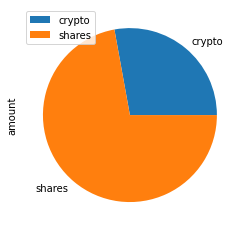

In [65]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [67]:
# Set ideal emergency fund
emergency_fund = household_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings < emergency_fund:
    print('Unfortunately you do not have enough in your emergency fund')
elif total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund')
else:
    print('You are exactly on pace for your emergency fund')

Congratulations! You have enough money in your emergency fund
